In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd /content/drive/MyDrive/604/assignment2

/content/drive/MyDrive/604/assignment2


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import randint
import numpy as np
from sklearn.feature_selection import SelectKBest, f_classif

In [ ]:

# Load the dataset
file_path = 'cleaned.csv'
df = pd.read_csv(file_path)
df.head()

,Age,Gender,Purchase_VALUE,Time_Spent,Newsletter,Voucher,Purchase_Month,Purchase_Day,Average_PurchaseValue,Pay_Method_0,Pay_Method_1,Pay_Method_2,Pay_Method_3,Browser_0,Browser_1,Browser_2,Browser_3
0,53,0,24.915,885,0,0,6,22,22.650000,False,True,False,False,True,False,False,False
1,18,1,2.896,656,0,1,12,10,12.066667,False,False,True,False,True,False,False,False
2,52,1,10.600,761,1,0,3,14,10.600000,True,False,False,False,True,False,False,False
3,29,0,43.280,906,1,0,10,25,10.820000,False,True,False,False,True,False,False,False
4,21,1,56.900,605,1,0,9,14,56.900000,False,True,False,False,True,False,False,False


In [ ]:
# Take a random sample (e.g., 10% of the data)
df = df.sample(frac=0.1, random_state=42)  # 10% sample
df.shape

(6580, 17)

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
# Remove Outliers using Z-score method

z_scores = np.abs(stats.zscore(df.select_dtypes(include=[np.number])))
df_cleaned = df[(z_scores < 3).all(axis=1)]


In [ ]:
# Define features (X) and target (y)
X = df.drop(columns=['Voucher'])
y = df['Voucher']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Resample the training data using SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)



Accuracy: 0.7198581560283688
Confusion Matrix:
[[1402   83]
 [ 470   19]]
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.94      0.84      1485
           1       0.19      0.04      0.06       489

    accuracy                           0.72      1974
   macro avg       0.47      0.49      0.45      1974
weighted avg       0.61      0.72      0.64      1974



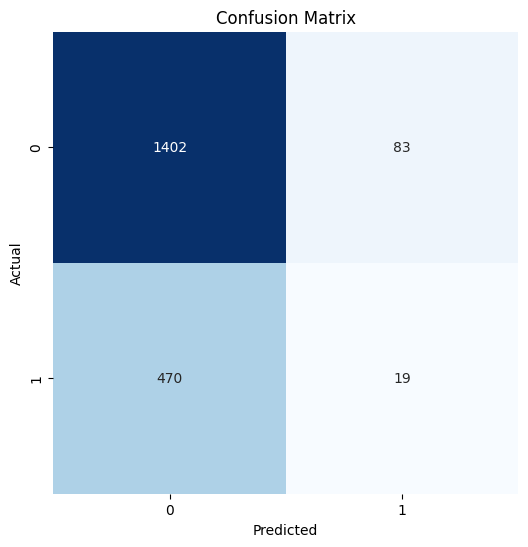

In [ ]:
# Select K best features
k_best = SelectKBest(score_func=f_classif, k=15)
X_train_kbest = k_best.fit_transform(X_train_resampled, y_train_resampled)
X_test_kbest = k_best.transform(X_test)

#Get the selected feature names
selected_features = X_train_resampled.columns[k_best.get_support()]

# Train the model
model = RandomForestClassifier(random_state=42, class_weight='balanced')
model.fit(X_train_kbest, y_train_resampled)

# Make predictions
y_pred = model.predict(X_test_kbest)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)


# Plot the confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()




In [ ]:
# Define the hyperparameter grid including class_weight
param_dist = {
    'n_estimators': randint(50, 200),
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': randint(2, 11),
    'min_samples_leaf': randint(1, 11),
    'bootstrap': [True, False],
    'class_weight': [None, 'balanced', 'balanced_subsample']  # Adding class_weight
}

# Initialize the model
rf_model = RandomForestClassifier(random_state=42)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_dist,
    n_iter=100,
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Perform Randomized Search
random_search.fit(X_train_kbest, y_train_resampled)


Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'class_weight': [None, 'balanced',
                                                         'balanced_subsample'],
                                        'max_depth': [None, 10, 20, 30, 40, 50],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x78879df3dd80>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x78879e0460b0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x78879df3c1f0>},
                   random_state=42, verbose=2)

Best Parameters: {'bootstrap': True, 'class_weight': 'balanced_subsample', 'max_depth': 50, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 170}
Best CV Score: 0.8025427978142158
Accuracy: 0.7213779128672746
Confusion Matrix:
[[1406   79]
 [ 471   18]]
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.95      0.84      1485
           1       0.19      0.04      0.06       489

    accuracy                           0.72      1974
   macro avg       0.47      0.49      0.45      1974
weighted avg       0.61      0.72      0.64      1974



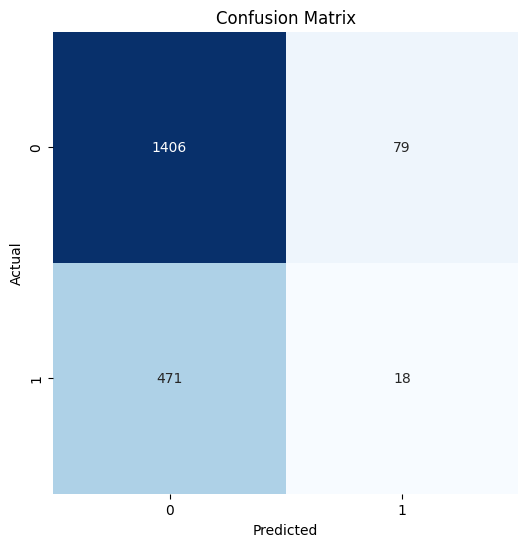

In [ ]:
# Best parameters found
best_params = random_search.best_params_
print(f'Best Parameters: {best_params}')

# Cross-validation results
cv_results = random_search.cv_results_
print(f'Best CV Score: {random_search.best_score_}')

# Train the best model on the entire training data
best_model = random_search.best_estimator_

# Make predictions on the test data
y_pred = best_model.predict(X_test_kbest)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

# Plot the confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
